# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nur Imam Masri
- **Email:** nurimammasri.01@gmail.com
- **ID Dicoding:** imammasri

## Menentukan Pertanyaan Bisnis

1. Apakah musim memiliki pengaruh signifikan terhadap jumlah total penyewaan sepeda, dan bagaimana trennya selama dua tahun observasi (2011-2012)?
2. Bagaimana pola penyewaan sepeda per jamnya berbeda antara hari kerja (working day) dan hari libur/akhir pekan (non-working day)?
3. Bagaimana kondisi cuaca (cerah, berkabut, hujan ringan/salju ringan) mempengaruhi jumlah total penyewaan sepeda, dan apakah ada perbedaan tren antara tahun 2011 dan 2012?
4. Bagaimana tren penyewaan sepeda bulanan selama dua tahun (2011-2012), dan apakah ada perbedaan pertumbuhan yang signifikan antara pengguna casual dan registered dalam tren ini?
5. Bagaimana distribusi jumlah penyewaan sepeda harian (`total_rentals`) bervariasi berdasarkan hari dalam seminggu (`weekday`), dan apakah ada perbedaan signifikan dalam variabilitas serta median antara pengguna casual dan registered?
6. Bagaimana dampak variabel cuaca kontinu seperti suhu (`temperature`), suhu yang dirasakan (`feeling_temperature`), kelembapan (`humidity`), dan kecepatan angin (`windspeed`) terhadap jumlah total penyewaan sepeda harian?
7. Bagaimana pola penyewaan sepeda per jam (`hour`) bervariasi tidak hanya berdasarkan tipe hari (`workingday`) tetapi juga berdasarkan musim (`season`)?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset harian (day.csv)
day_df = pd.read_csv("data/day.csv")
# Memuat dataset jam-an (hour.csv)
hour_df = pd.read_csv("data/hour.csv")

print("Data Harian (day_df) - 5 baris pertama:")
print(day_df.head())
print("\nData Jam-an (hour_df) - 5 baris pertama:")
print(hour_df.head())

Data Harian (day_df) - 5 baris pertama:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  156

Berdasarkan lima baris pertama dari kedua dataset, kita dapat menarik beberapa observasi awal:

- **Data Harian (`day_df`)**
* **Struktur Data:** Dataset harian mencatat agregasi penyewaan sepeda per hari. Kolom seperti `instant` berfungsi sebagai indeks.
* **Informasi Tanggal:** Kolom `dteday` menunjukkan tanggal pencatatan. Data dimulai dari 1 Januari 2011.
* **Variabel Musiman dan Waktu:** Terdapat kolom `season`, `yr` (tahun), dan `mnth` (bulan) yang sudah dalam bentuk numerik, yang nantinya dapat diubah menjadi kategori yang lebih deskriptif.
* **Status Hari:** Kolom `holiday`, `weekday`, dan `workingday` memberikan informasi mengenai apakah hari tersebut adalah hari libur, hari dalam seminggu, atau hari kerja. Ini penting untuk analisis pola penggunaan.
* **Kondisi Cuaca:** `weathersit` (kondisi cuaca), `temp` (suhu aktual), `atemp` (suhu yang dirasakan), `hum` (kelembapan), dan `windspeed` (kecepatan angin) adalah variabel lingkungan yang sangat mungkin mempengaruhi jumlah penyewaan. Suhu, kelembapan, dan kecepatan angin tampaknya sudah dinormalisasi.
* **Jumlah Penyewaan:** Kolom `casual` (pengguna biasa), `registered` (pengguna terdaftar), dan `cnt` (total penyewaan) adalah target variabel utama untuk dianalisis. Terlihat bahwa jumlah pengguna terdaftar bisa jauh lebih tinggi daripada pengguna biasa.

- **Data Jam-an (`hour_df`)**
* **Granularitas Data:** Dataset jam-an menyediakan data yang lebih detail, yaitu per jam. Ini memungkinkan analisis pola penggunaan dalam satu hari.
* **Kolom Jam (`hr`):** Adanya kolom `hr` (0-23) adalah pembeda utama dari dataset harian dan krusial untuk analisis pola per jam.
* **Konsistensi Kolom Lain:** Sebagian besar kolom lainnya (seperti `dteday`, `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, variabel cuaca, dan jumlah penyewaan) juga ada di dataset ini, namun dengan nilai yang spesifik untuk jam tertentu.
* **Variasi Penyewaan per Jam:** Bahkan dalam lima baris pertama yang semuanya berasal dari tanggal yang sama (1 Januari 2011), terlihat variasi jumlah penyewaan (`cnt`) per jam (misalnya, 16, 40, 32, 13, 1). Ini menunjukkan pentingnya analisis pada level jam.

- **Observasi Umum**
* Kedua dataset tampak terstruktur dengan baik dan siap untuk tahap *assessing* dan *cleaning* lebih lanjut, terutama terkait tipe data (`dteday`) dan pengubahan nilai numerik kategorikal menjadi label yang lebih mudah dibaca.
* Dataset ini kaya akan informasi temporal, status hari, dan kondisi cuaca yang dapat dieksplorasi untuk memahami faktor-faktor yang mempengaruhi perilaku penyewaan sepeda.

### Assessing Data

#### Menilai Data day.csv

In [3]:
print("\nInformasi Data Harian (day_df):")
day_df.info()
print("\nJumlah duplikasi data harian:", day_df.duplicated().sum())
print("\nStatistik deskriptif data harian:")
print(day_df.describe())


Informasi Data Harian (day_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Jumlah duplikasi data harian: 0

Statistik deskriptif data 

* **Struktur dan Tipe Data:**
    * Dataset terdiri dari 731 baris dan 16 kolom.
    * Semua kolom memiliki 731 entri non-null, yang berarti tidak ada nilai yang hilang (*missing values*) dalam dataset ini.
    * Sebagian besar kolom (11 kolom) bertipe `int64` (bilangan bulat) dan 4 kolom bertipe `float64` (bilangan desimal).
    * Kolom `dteday` adalah satu-satunya yang bertipe `object`, yang mengindikasikan bahwa ini kemungkinan adalah string dan perlu dikonversi ke tipe data tanggal/waktu (datetime) untuk analisis berbasis waktu.
    * Penggunaan memori dataset ini adalah sekitar 91.5+ KB.

* **Duplikasi Data:**
    * Jumlah duplikasi data adalah 0, menunjukkan bahwa setiap baris dalam dataset adalah unik.

* **Statistik Deskriptif:**
    * **`instant`**: Berfungsi sebagai indeks record dari 1 hingga 731.
    * **`season`**: Nilai berkisar antara 1 hingga 4, mewakili empat musim. Nilai rata-rata sekitar 2.5 menunjukkan distribusi yang cukup merata antar musim, meskipun perlu dilihat lebih detail.
    * **`yr`**: Nilai 0 (mewakili tahun 2011) dan 1 (mewakili tahun 2012). Rata-rata sekitar 0.5 menunjukkan jumlah data yang hampir seimbang antara kedua tahun.
    * **`mnth`**: Nilai berkisar antara 1 hingga 12, mewakili bulan. Rata-rata 6.5 menunjukkan distribusi data yang merata sepanjang tahun.
    * **`holiday`**: Nilai 0 (bukan hari libur) dan 1 (hari libur). Rata-rata 0.028 menunjukkan bahwa sebagian kecil dari hari dalam dataset adalah hari libur.
    * **`weekday`**: Nilai berkisar antara 0 hingga 6, mewakili hari dalam seminggu. Rata-rata sekitar 3 menunjukkan distribusi yang merata.
    * **`workingday`**: Nilai 0 (akhir pekan/hari libur) dan 1 (hari kerja). Rata-rata 0.68 menunjukkan bahwa sekitar 68% dari hari adalah hari kerja.
    * **`weathersit`**: Kondisi cuaca dengan nilai 1, 2, atau 3. Tidak ada nilai 4 (cuaca ekstrem) dalam dataset harian ini. Rata-rata 1.395 menunjukkan bahwa cuaca cenderung baik (cerah atau sedikit berawan).
    * **`temp`, `atemp`, `hum`, `windspeed`**: Variabel cuaca ini adalah nilai ternormalisasi.
        * `temp` (suhu): Rata-rata 0.495 (sekitar pertengahan dari skala normalisasi).
        * `atemp` (suhu yang dirasakan): Rata-rata 0.474, sedikit lebih rendah dari suhu aktual, yang masuk akal.
        * `hum` (kelembapan): Rata-rata 0.627.
        * `windspeed` (kecepatan angin): Rata-rata 0.190.
        * Semua variabel ini memiliki nilai minimum dan maksimum yang masuk akal dalam skala normalisasi mereka. Tidak ada nilai kelembapan (hum) 0.0 yang mungkin aneh, namun dalam data ini ada.
    * **`casual`, `registered`, `cnt`**:
        * `casual` (pengguna biasa): Rata-rata penyewaan harian sekitar 848, dengan nilai minimum 2 dan maksimum 3410.
        * `registered` (pengguna terdaftar): Rata-rata penyewaan harian sekitar 3656, jauh lebih tinggi dari pengguna biasa, dengan minimum 20 dan maksimum 6946.
        * `cnt` (total penyewaan): Rata-rata penyewaan harian total sekitar 4504, dengan minimum 22 dan maksimum 8714.
        * Standar deviasi untuk ketiga kolom ini cukup besar, menunjukkan variabilitas yang tinggi dalam jumlah penyewaan harian.

**Kesimpulan Awal dari Assessing Data Harian:**
* Data tampak bersih dari nilai yang hilang dan duplikasi.
* Perlu dilakukan konversi tipe data untuk kolom `dteday`.
* Kolom-kolom kategorikal numerik (seperti `season`, `yr`, `mnth`, `weekday`, `workingday`, `weathersit`) akan lebih bermanfaat jika diubah menjadi label string untuk interpretasi dan visualisasi yang lebih baik.
* Distribusi data penyewaan (casual, registered, cnt) menunjukkan variasi yang luas.

#### Menilai data hour.csv

In [4]:
print("\nInformasi Data Jam-an (hour_df):")
hour_df.info()
print("\nJumlah duplikasi data jam-an:", hour_df.duplicated().sum())
print("\nStatistik deskriptif data jam-an:")
print(hour_df.describe())


Informasi Data Jam-an (hour_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Jumlah duplika

* **Struktur dan Tipe Data:**
    * Dataset jam-an ini jauh lebih besar, terdiri dari 17.379 baris (entri per jam) dan 17 kolom.
    * Sama seperti dataset harian, semua kolom memiliki 17.379 entri non-null, yang mengindikasikan tidak ada nilai yang hilang (*missing values*).
    * Terdapat 12 kolom bertipe `int64`, 4 kolom bertipe `float64`, dan 1 kolom (`dteday`) bertipe `object`. Kolom `hr` (jam) adalah tambahan penting dibandingkan dataset harian.
    * Penggunaan memori untuk dataset ini lebih besar, yaitu sekitar 2.3+ MB, karena jumlah baris yang lebih banyak.

* **Duplikasi Data:**
    * Jumlah duplikasi data adalah 0, yang berarti setiap entri per jam adalah unik.

* **Statistik Deskriptif:**
    * **`instant`**: Berfungsi sebagai indeks record dari 1 hingga 17.379.
    * **`season`, `yr`, `mnth`**: Serupa dengan dataset harian, variabel ini menunjukkan musim, tahun (0 untuk 2011, 1 untuk 2012), dan bulan (1-12).
    * **`hr`**: Kolom jam, dengan nilai dari 0 hingga 23. Rata-rata sekitar 11.5 menunjukkan distribusi jam yang merata sepanjang periode observasi.
    * **`holiday`, `weekday`, `workingday`**: Variabel status hari yang sama dengan dataset harian, namun pada level per jam.
    * **`weathersit`**: Kondisi cuaca dengan nilai dari 1 hingga 4. Berbeda dengan dataset harian yang hanya sampai 3, dataset jam-an ini mencakup kondisi cuaca 4 ('Heavy Rain/Fog'), meskipun kemungkinan frekuensinya rendah mengingat rata-ratanya 1.42.
    * **`temp`, `atemp`, `hum`, `windspeed`**: Variabel cuaca ternormalisasi.
        * `temp` (suhu): Rentang dari 0.02 hingga 1.0, rata-rata 0.49.
        * `atemp` (suhu yang dirasakan): Rentang dari 0.0 hingga 1.0, rata-rata 0.47.
        * `hum` (kelembapan): Rentang dari 0.0 hingga 1.0, rata-rata 0.62.
        * `windspeed` (kecepatan angin): Rentang dari 0.0 hingga 0.85, rata-rata 0.19.
        * Nilai minimum 0.0 untuk `atemp`, `hum`, dan `windspeed` perlu diperhatikan, meskipun mungkin valid dalam konteks normalisasi atau kondisi cuaca tertentu.
    * **`casual`, `registered`, `cnt`**: Jumlah penyewaan per jam.
        * `casual`: Rata-rata penyewaan per jam sekitar 35.7, dengan minimum 0 dan maksimum 367.
        * `registered`: Rata-rata penyewaan per jam sekitar 153.8, jauh lebih tinggi dari pengguna biasa, dengan minimum 0 dan maksimum 886.
        * `cnt` (total penyewaan): Rata-rata penyewaan total per jam sekitar 189.5, dengan minimum 1 dan maksimum 977.
        * Standar deviasi untuk ketiga kolom ini cukup besar relatif terhadap rata-ratanya (misalnya, untuk `cnt`, std 181.4 vs mean 189.5), yang mengindikasikan variabilitas yang sangat tinggi dalam jumlah penyewaan dari jam ke jam.

**Kesimpulan Awal dari Assessing Data Jam-an:**
* Data jam-an juga bersih dari nilai yang hilang dan duplikasi.
* Kolom `dteday` perlu dikonversi ke tipe datetime.
* Kolom kategorikal numerik perlu diubah menjadi label string untuk analisis yang lebih baik.
* Kehadiran `weathersit` bernilai 4 menunjukkan adanya data untuk kondisi cuaca ekstrem, meskipun mungkin jarang.
* Variabel penyewaan per jam (`casual`, `registered`, `cnt`) menunjukkan fluktuasi yang tinggi, yang diharapkan karena adanya pola harian (misalnya, jam sibuk vs. jam sepi).

#### Ringkasan Assessing Data:
- **Missing Values:** Tidak ada missing values pada kedua dataset.
- **Duplikasi Data:** Tidak ada duplikasi data pada kedua dataset.
- **Tipe Data:** Kolom 'dteday' pada kedua dataset masih bertipe object dan perlu diubah ke datetime. Kolom-kolom kategorikal akan di-map ke representasi string/kategori.
- **Inaccurate Values:** Nilai-nilai tampak dalam rentang yang wajar.

### Cleaning Data

Secara umum, proses cleaning untuk kedua dataset (`day_df` dan `hour_df`) mengikuti langkah-langkah yang sangat mirip karena keduanya berasal dari sumber yang sama dan memiliki banyak kolom identik. Namun, ada perbedaan inheren karena granularitas datanya (harian vs. jam-an).

**Langkah-langkah Umum yang Sama untuk Kedua Dataset:**

1.  **Pembuatan Salinan Data:**
    * Baik `day_df` maupun `hour_df` disalin terlebih dahulu (`.copy()`) untuk menjaga integritas data asli.
2.  **Konversi Tipe Data Tanggal:**
    * Kolom `dteday` pada kedua dataset diubah dari tipe `object` menjadi `datetime` menggunakan `pd.to_datetime()`. Ini adalah langkah krusial untuk analisis berbasis waktu.
3.  **Penghapusan Kolom Tidak Relevan:**
    * Kolom `instant` dihapus dari kedua dataset karena hanya merupakan indeks baris dan tidak memberikan nilai analitis.
4.  **Penggantian Nama Kolom (Renaming):**
    * Kolom-kolom berikut diganti namanya pada kedua dataset untuk meningkatkan keterbacaan dan konsistensi:
        * `dteday` menjadi `date`
        * `yr` menjadi `year`
        * `mnth` menjadi `month`
        * `weathersit` menjadi `weather_condition`
        * `temp` menjadi `temperature`
        * `atemp` menjadi `feeling_temperature`
        * `hum` menjadi `humidity`
        * `cnt` menjadi `total_rentals`
5.  **Pemetaan Nilai Kategorikal ke String Deskriptif:**
    * Transformasi ini juga diterapkan pada kedua dataset untuk kolom-kolom berikut:
        * `season`: Dari (1:springer, 2:summer, 3:fall, 4:winter) menjadi ('Spring', 'Summer', 'Fall', 'Winter').
        * `year`: Dari (0: 2011, 1:2012) menjadi (2011, 2012).
        * `month`: Dari (1-12) menjadi ('Jan', 'Feb', ..., 'Dec'). Kolom `month_num` dibuat pada kedua dataset untuk menyimpan nilai numerik asli bulan, yang berguna untuk pengurutan.
        * `weekday`: Dari (0-6) menjadi ('Sunday', 'Monday', ..., 'Saturday').
        * `workingday`: Dari (1: hari kerja, 0: akhir pekan/hari libur) menjadi ('Working Day', 'Non-Working Day').
        * `weather_condition`: Dari (1: Clear/Few clouds..., 2: Mist + Cloudy..., 3: Light Snow/Rain..., 4: Heavy Rain/Fog...) menjadi label deskriptif yang sesuai.
6.  **Konversi Tipe Data Kolom Kategorikal:**
    * Setelah pemetaan, kolom-kolom kategorikal tersebut (`season`, `year`, `month`, `weekday`, `workingday`, `weather_condition`, `holiday`) diubah tipe datanya menjadi `category` pada kedua dataset. Ini membantu efisiensi memori dan pengurutan yang benar dalam visualisasi.

**Perbedaan Spesifik dalam Cleaning atau Kolom yang Ada:**

* **Kolom `hr` (Jam):**
    * **Hanya ada di `hour_df`**. Kolom ini diganti namanya menjadi `hour` saat proses renaming pada `hour_df_cleaned`.
    * Tidak ada langkah cleaning khusus untuk nilai-nilai di kolom `hr` karena sudah dalam format numerik yang benar (0-23). Konversi ke tipe `category` untuk kolom `hour` bisa dipertimbangkan jika akan diperlakukan sebagai kategori diskrit dalam beberapa analisis, namun seringkali lebih berguna sebagai numerik untuk analisis pola per jam. Dalam kode yang Anda berikan, `hour` tidak diubah menjadi `category`, yang mana ini adalah pendekatan yang valid.
* **Penanganan Kolom `holiday`:**
    * Meskipun kolom `holiday` ada di kedua dataset asli, dan ada dalam loop konversi `astype('category')`, dalam notebook Anda ada komentar yang mengindikasikan bahwa Anda mungkin mempertimbangkan untuk menghapusnya dari `day_df` jika tidak digunakan. Namun, berdasarkan kode cleaning yang Anda tampilkan, kolom `holiday` **tidak dihapus** dari kedua dataframe (`day_df_cleaned` dan `hour_df_cleaned`) dan akan dikonversi menjadi tipe `category`. Jika Anda memutuskan untuk tidak menganalisis `holiday` secara langsung (karena informasinya sudah tercakup dalam `workingday`), maka langkah pemetaannya ke string deskriptif (jika diperlukan, karena aslinya hanya 0/1) dan konversi ke `category` tetap akan berlaku jika kolomnya tidak dihapus.

- **Insight dari Proses Cleaning:**

* **Granularitas Data:** Perbedaan utama bukanlah pada *cara* cleaning, tetapi pada *hasil akhir* dan *potensi analisis* karena granularitas data. `hour_df_cleaned` memungkinkan analisis pola intra-hari yang tidak mungkin dilakukan dengan `day_df_cleaned`.
* **Konsistensi:** Langkah cleaning yang diterapkan secara konsisten pada kolom-kolom yang sama di kedua dataset (misalnya, `season`, `weather_condition`) memastikan bahwa perbandingan atau potensi penggabungan data di masa depan dapat dilakukan dengan lebih mudah.
* **Data Siap Pakai:** Kedua dataset kini memiliki struktur yang lebih baik, tipe data yang benar, dan label yang mudah dipahami, membuat keduanya siap untuk tahap EDA dan visualisasi yang lebih mendalam sesuai dengan karakteristik masing-masing (analisis tren harian dari `day_df_cleaned` dan analisis pola per jam dari `hour_df_cleaned`).
* **Pentingnya `month_num`:** Pembuatan `month_num` sebelum mengkonversi `month` menjadi nama string adalah langkah cerdas untuk kedua dataset, karena mempertahankan kemampuan untuk mengurutkan berdasarkan urutan bulan kalender dengan mudah.

#### Membersihkan dan Mempersiapkan day_df

In [5]:
# Membuat salinan dari DataFrame asli untuk menghindari modifikasi data mentah secara langsung.
# Ini adalah praktik yang baik untuk menjaga integritas data asli.
day_df_cleaned = day_df.copy()

# Mengubah tipe data kolom 'dteday' dari object (string) menjadi format datetime.
# Ini memungkinkan operasi dan analisis berbasis tanggal dan waktu.
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])

# Menghapus kolom 'instant' dari DataFrame.
# Kolom ini biasanya merupakan indeks atau ID unik yang tidak diperlukan untuk analisis data.
day_df_cleaned = day_df_cleaned.drop(['instant'], axis=1)

# Mengganti nama beberapa kolom agar lebih deskriptif dan mudah diinterpretasikan.
day_df_cleaned = day_df_cleaned.rename(columns={
    'dteday': 'date',                 # 'dteday' menjadi 'date'
    'yr': 'year',                     # 'yr' menjadi 'year'
    'mnth': 'month',                  # 'mnth' menjadi 'month'
    'weathersit': 'weather_condition',# 'weathersit' menjadi 'weather_condition'
    'temp': 'temperature',            # 'temp' menjadi 'temperature' (suhu aktual)
    'atemp': 'feeling_temperature',   # 'atemp' menjadi 'feeling_temperature' (suhu yang dirasakan)
    'hum': 'humidity',                # 'hum' menjadi 'humidity'
    'cnt': 'total_rentals'            # 'cnt' menjadi 'total_rentals'
})

# Memetakan nilai numerik pada kolom 'season' ke representasi string nama musim.
# 1: Spring, 2: Summer, 3: Fall, 4: Winter
day_df_cleaned['season'] = day_df_cleaned['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Memetakan nilai numerik pada kolom 'year' ke tahun aktual.
# 0: 2011, 1: 2012
day_df_cleaned['year'] = day_df_cleaned['year'].map({0: 2011, 1: 2012})

# Menyimpan nilai numerik asli dari kolom 'month' ke kolom baru 'month_num'.
# Ini berguna untuk pengurutan atau operasi numerik jika diperlukan.
day_df_cleaned['month_num'] = day_df_cleaned['month']

# Memetakan nilai numerik pada kolom 'month' ke nama bulan dalam format string.
day_df_cleaned['month'] = day_df_cleaned['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Memetakan nilai numerik pada kolom 'weekday' ke nama hari.
# 0: Sunday, ..., 6: Saturday
day_df_cleaned['weekday'] = day_df_cleaned['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Memetakan nilai numerik pada kolom 'workingday' ke deskripsi status hari kerja.
# 1: Working Day (hari kerja), 0: Non-Working Day (akhir pekan atau hari libur)
day_df_cleaned['workingday'] = day_df_cleaned['workingday'].map({1: 'Working Day', 0: 'Non-Working Day'})

# Memetakan nilai numerik pada kolom 'weather_condition' ke deskripsi kondisi cuaca.
day_df_cleaned['weather_condition'] = day_df_cleaned['weather_condition'].map({
    1: 'Clear/Cloudy',         
    2: 'Mist/Cloudy',          
    3: 'Light Snow/Rain',      
    4: 'Heavy Rain/Fog'        
})

# Mengubah tipe data kolom-kolom yang telah dipetakan menjadi tipe 'category'.
# Ini dapat menghemat memori dan meningkatkan performa untuk operasi pada kolom tersebut,
# serta memastikan urutan yang benar dalam visualisasi jika kategori diurutkan.
for col in ['season', 'year', 'month', 'weekday', 'workingday', 'weather_condition', 'holiday']:
    if col in day_df_cleaned.columns: # Memeriksa apakah kolom ada sebelum konversi
        day_df_cleaned[col] = day_df_cleaned[col].astype('category')

# Menampilkan lima baris pertama dari DataFrame yang sudah dibersihkan untuk verifikasi.
print("\nData Harian (day_df) setelah cleaning - 5 baris pertama:")
print(day_df_cleaned.head())

# Menampilkan informasi ringkas tentang DataFrame yang sudah dibersihkan,
# termasuk tipe data setiap kolom dan jumlah nilai non-null.
print("\nInformasi Data Harian (day_df) setelah cleaning:")
day_df_cleaned.info()


Data Harian (day_df) setelah cleaning - 5 baris pertama:
        date  season  year month holiday    weekday       workingday  \
0 2011-01-01  Spring  2011   Jan       0   Saturday  Non-Working Day   
1 2011-01-02  Spring  2011   Jan       0     Sunday  Non-Working Day   
2 2011-01-03  Spring  2011   Jan       0     Monday      Working Day   
3 2011-01-04  Spring  2011   Jan       0    Tuesday      Working Day   
4 2011-01-05  Spring  2011   Jan       0  Wednesday      Working Day   

  weather_condition  temperature  feeling_temperature  humidity  windspeed  \
0       Mist/Cloudy     0.344167             0.363625  0.805833   0.160446   
1       Mist/Cloudy     0.363478             0.353739  0.696087   0.248539   
2      Clear/Cloudy     0.196364             0.189405  0.437273   0.248309   
3      Clear/Cloudy     0.200000             0.212122  0.590435   0.160296   
4      Clear/Cloudy     0.226957             0.229270  0.436957   0.186900   

   casual  registered  total_rentals  mo

#### Membersihkan dan Mempersiapkan hour_df

In [6]:
# Membersihkan dan Mempersiapkan hour_df

# Membuat salinan dari DataFrame asli 'hour_df' untuk operasi cleaning.
# Ini memastikan data asli tetap tidak berubah.
hour_df_cleaned = hour_df.copy()

# Mengubah tipe data kolom 'dteday' dari object (string) menjadi format datetime.
# Penting untuk analisis yang melibatkan informasi tanggal dan waktu.
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])

# Menghapus kolom 'instant' dari DataFrame.
# Kolom ini umumnya adalah indeks dan tidak memberikan informasi analitis yang signifikan.
hour_df_cleaned = hour_df_cleaned.drop(['instant'], axis=1)

# Mengganti nama beberapa kolom agar lebih deskriptif, intuitif, dan konsisten.
hour_df_cleaned = hour_df_cleaned.rename(columns={
    'dteday': 'date',                 # 'dteday' menjadi 'date'
    'yr': 'year',                     # 'yr' menjadi 'year'
    'mnth': 'month',                  # 'mnth' menjadi 'month'
    'hr': 'hour',                     # 'hr' menjadi 'hour' (spesifik untuk dataset jam-an)
    'weathersit': 'weather_condition',# 'weathersit' menjadi 'weather_condition'
    'temp': 'temperature',            # 'temp' menjadi 'temperature' (suhu aktual)
    'atemp': 'feeling_temperature',   # 'atemp' menjadi 'feeling_temperature' (suhu yang dirasakan)
    'hum': 'humidity',                # 'hum' menjadi 'humidity'
    'cnt': 'total_rentals'            # 'cnt' menjadi 'total_rentals'
})

# Memetakan nilai numerik pada kolom 'season' ke representasi string nama musim.
hour_df_cleaned['season'] = hour_df_cleaned['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Memetakan nilai numerik pada kolom 'year' ke tahun aktual.
hour_df_cleaned['year'] = hour_df_cleaned['year'].map({0: 2011, 1: 2012})

# Menyimpan nilai numerik asli dari kolom 'month' ke kolom baru 'month_num'.
# Berguna untuk pengurutan atau operasi numerik berdasarkan bulan.
hour_df_cleaned['month_num'] = hour_df_cleaned['month']

# Memetakan nilai numerik pada kolom 'month' ke nama bulan dalam format string.
hour_df_cleaned['month'] = hour_df_cleaned['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Memetakan nilai numerik pada kolom 'weekday' ke nama hari.
hour_df_cleaned['weekday'] = hour_df_cleaned['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

# Memetakan nilai numerik pada kolom 'workingday' ke deskripsi status hari kerja.
# 1: Working Day (hari kerja), 0: Non-Working Day (akhir pekan atau hari libur)
hour_df_cleaned['workingday'] = hour_df_cleaned['workingday'].map({1: 'Working Day', 0: 'Non-Working Day'})

# Memetakan nilai numerik pada kolom 'weather_condition' ke deskripsi kondisi cuaca.
hour_df_cleaned['weather_condition'] = hour_df_cleaned['weather_condition'].map({
    1: 'Clear/Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Fog'
})

# Mengubah tipe data kolom-kolom kategorikal yang telah dipetakan menjadi tipe 'category'.
# Ini membantu efisiensi memori dan memastikan urutan yang benar dalam visualisasi.
for col in ['season', 'year', 'month', 'weekday', 'workingday', 'weather_condition', 'holiday']:
     if col in hour_df_cleaned.columns: # Memeriksa apakah kolom ada sebelum konversi
        hour_df_cleaned[col] = hour_df_cleaned[col].astype('category')

# Menampilkan lima baris pertama dari DataFrame jam-an yang sudah dibersihkan untuk verifikasi.
print("\nData Jam-an (hour_df) setelah cleaning - 5 baris pertama:")
print(hour_df_cleaned.head())

# Menampilkan informasi ringkas tentang DataFrame jam-an yang sudah dibersihkan,
# termasuk tipe data setiap kolom dan jumlah nilai non-null.
print("\nInformasi Data Jam-an (hour_df) setelah cleaning:")
hour_df_cleaned.info()


Data Jam-an (hour_df) setelah cleaning - 5 baris pertama:
        date  season  year month  hour holiday   weekday       workingday  \
0 2011-01-01  Spring  2011   Jan     0       0  Saturday  Non-Working Day   
1 2011-01-01  Spring  2011   Jan     1       0  Saturday  Non-Working Day   
2 2011-01-01  Spring  2011   Jan     2       0  Saturday  Non-Working Day   
3 2011-01-01  Spring  2011   Jan     3       0  Saturday  Non-Working Day   
4 2011-01-01  Spring  2011   Jan     4       0  Saturday  Non-Working Day   

  weather_condition  temperature  feeling_temperature  humidity  windspeed  \
0      Clear/Cloudy         0.24               0.2879      0.81        0.0   
1      Clear/Cloudy         0.22               0.2727      0.80        0.0   
2      Clear/Cloudy         0.22               0.2727      0.80        0.0   
3      Clear/Cloudy         0.24               0.2879      0.75        0.0   
4      Clear/Cloudy         0.24               0.2879      0.75        0.0   

   casual

## Exploratory Data Analysis (EDA)

In [7]:
# Persiapan urutan untuk plotting
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weather_order = ['Clear/Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Fog']

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah musim memiliki pengaruh signifikan terhadap jumlah total penyewaan sepeda, dan bagaimana trennya selama dua tahun observasi (2011-2012)?

C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\3069766064.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = day_df_cleaned.groupby(by=["season", "year"])["total_rentals"].sum().reset_index()


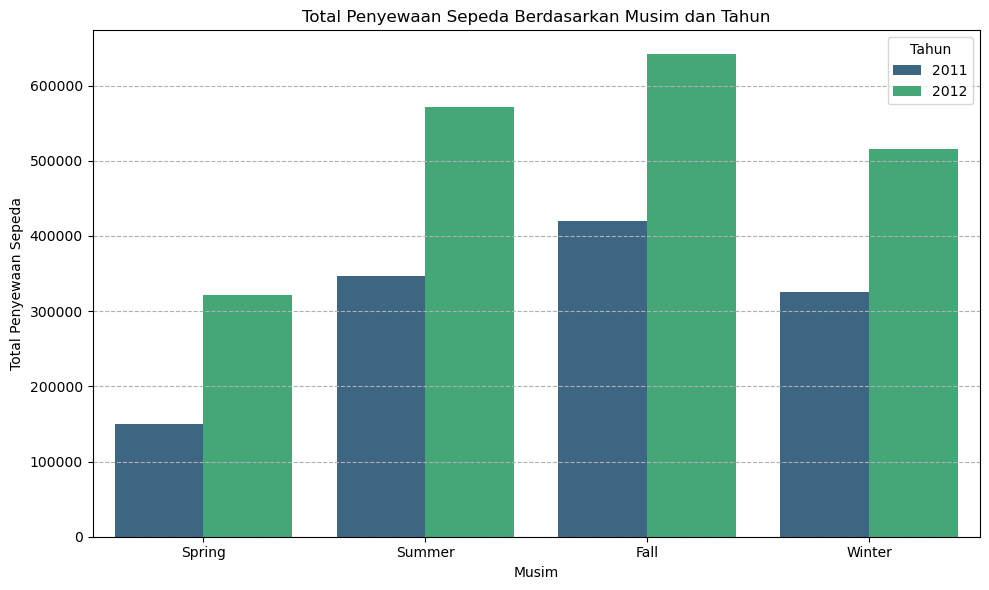

In [8]:
seasonal_rentals = day_df_cleaned.groupby(by=["season", "year"])["total_rentals"].sum().reset_index()
seasonal_rentals['season'] = pd.Categorical(seasonal_rentals['season'], categories=season_order, ordered=True)
seasonal_rentals = seasonal_rentals.sort_values('season')

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_rentals, x="season", y="total_rentals", hue="year", palette="viridis")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim dan Tahun")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.legend(title="Tahun")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### Insight Pertanyaan 1:
- **Peningkatan Umum:** Terlihat adanya peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012 di semua musim, menandakan pertumbuhan popularitas bike sharing.
- **Puncak Penyewaan:** Musim Gugur (Fall) secara konsisten menunjukkan jumlah penyewaan tertinggi di kedua tahun, diikuti oleh Musim Panas (Summer) dan Musim Dingin (Winter).
- **Penyewaan Terendah:** Musim Semi (Spring) memiliki jumlah penyewaan terendah, terutama pada tahun 2011.
- **Kesimpulan:** Musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Musim Gugur dan Musim Panas adalah periode puncak, sementara Musim Semi adalah yang terendah. Ada tren peningkatan penggunaan secara keseluruhan dari 2011 ke 2012.


### Pertanyaan 2: Bagaimana pola penyewaan sepeda per jamnya berbeda antara hari kerja (working day) dan hari libur/akhir pekan (non-working day)?

C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\4085672727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_pattern = hour_df_cleaned.groupby(by=["workingday", "hour"])["total_rentals"].mean().reset_index()


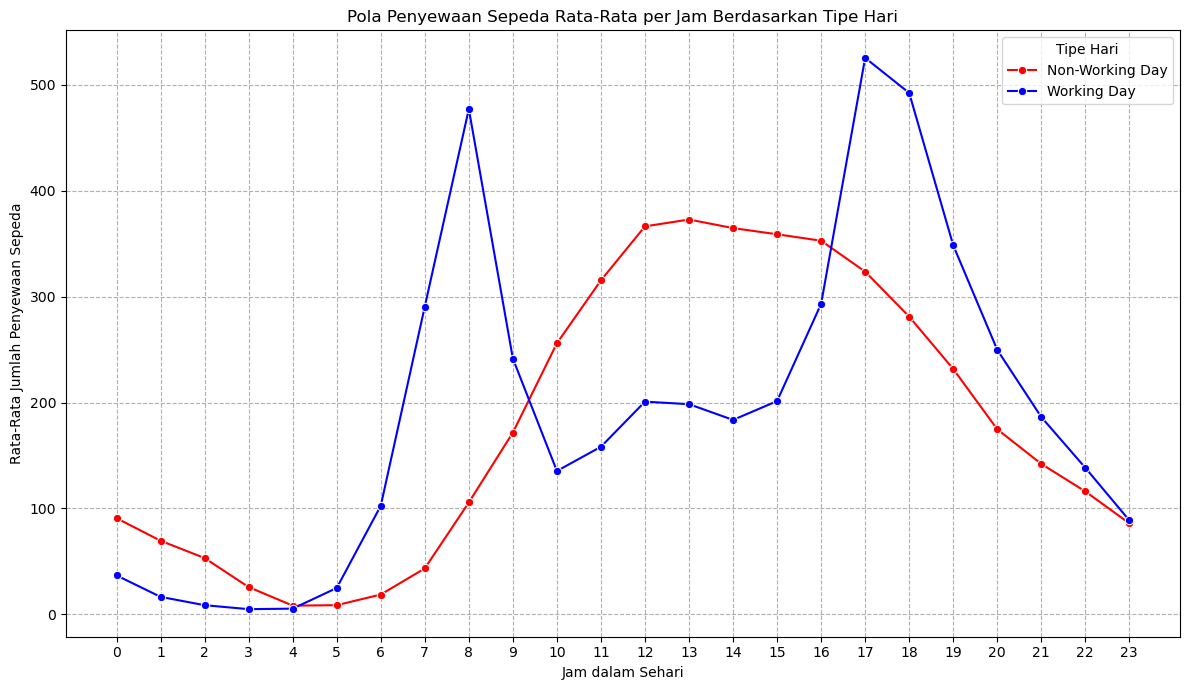

In [9]:
hourly_pattern = hour_df_cleaned.groupby(by=["workingday", "hour"])["total_rentals"].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=hourly_pattern, x="hour", y="total_rentals", hue="workingday", marker="o", palette={"Working Day": "blue", "Non-Working Day": "red"})
plt.title("Pola Penyewaan Sepeda Rata-Rata per Jam Berdasarkan Tipe Hari")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-Rata Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.legend(title="Tipe Hari")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

#### Insight Pertanyaan 2:
- **Hari Kerja (Working Day):** Menunjukkan dua puncak penyewaan (pagi sekitar jam 7-9 dan sore sekitar jam 17-19) yang khas untuk pola komuter.
- **Hari Libur/Akhir Pekan (Non-Working Day):** Pola penyewaan lebih merata dengan puncak yang lebih landai di siang hingga sore hari (sekitar jam 10-17), menunjukkan penggunaan untuk rekreasi.
- **Kesimpulan:** Pola penyewaan per jam sangat berbeda, mencerminkan tujuan penggunaan yang berbeda (komuter vs. rekreasi) antara hari kerja dan non-hari kerja.

### Pertanyaan 3: Bagaimana kondisi cuaca (cerah, berkabut, hujan ringan/salju ringan) mempengaruhi jumlah total penyewaan sepeda, dan apakah ada perbedaan tren antara tahun 2011 dan 2012?

C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\807232798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = day_df_cleaned.groupby(by=["weather_condition", "year"])["total_rentals"].sum().reset_index()


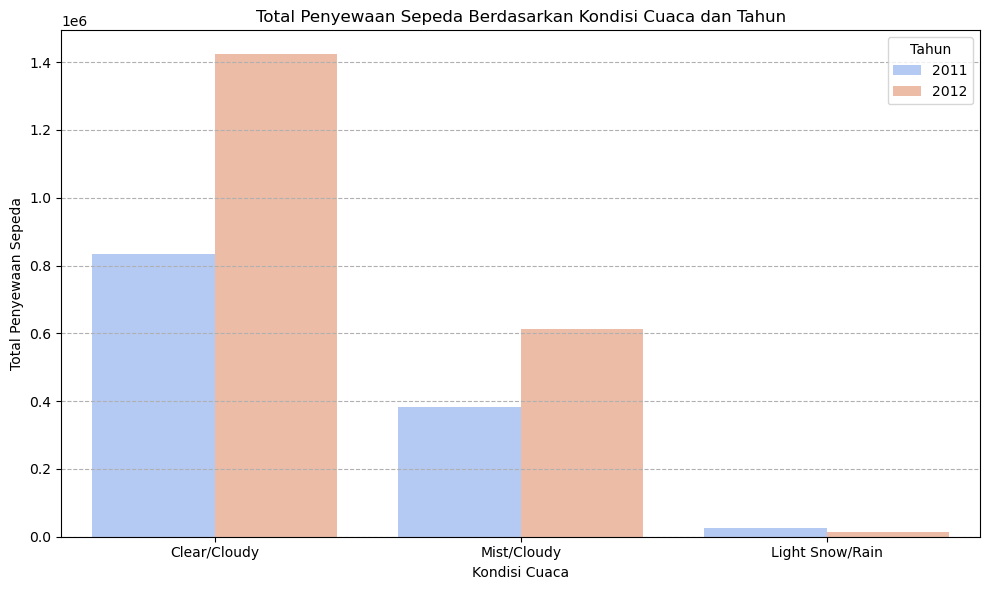

In [10]:
weather_rentals = day_df_cleaned.groupby(by=["weather_condition", "year"])["total_rentals"].sum().reset_index()
existing_weather_conditions = day_df_cleaned['weather_condition'].unique()
weather_order_filtered = [cond for cond in weather_order if cond in existing_weather_conditions] # Hanya plot kategori yg ada di data
weather_rentals['weather_condition'] = pd.Categorical(weather_rentals['weather_condition'], categories=weather_order_filtered, ordered=True)
weather_rentals = weather_rentals.sort_values('weather_condition')

plt.figure(figsize=(10, 6))
sns.barplot(data=weather_rentals, x="weather_condition", y="total_rentals", hue="year", palette="coolwarm")
plt.title("Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca dan Tahun")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda")
plt.legend(title="Tahun")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### Insight Pertanyaan 3:
- **Cuaca Ideal:** 'Cerah/Berawan' adalah kondisi cuaca dengan penyewaan tertinggi.
- **Penurunan Akibat Cuaca:** Penyewaan menurun pada kondisi 'Berkabut/Berawan' dan sangat rendah pada 'Salju Ringan/Hujan Ringan'.
- **Kesimpulan:** Kondisi cuaca adalah faktor krusial; cuaca yang baik meningkatkan penyewaan, sementara cuaca buruk menurunkannya secara signifikan.

### Pertanyaan Tambahan 4: Bagaimana tren penyewaan sepeda bulanan selama dua tahun (2011-2012), dan apakah ada perbedaan pertumbuhan yang signifikan antara pengguna casual dan registered dalam tren ini?

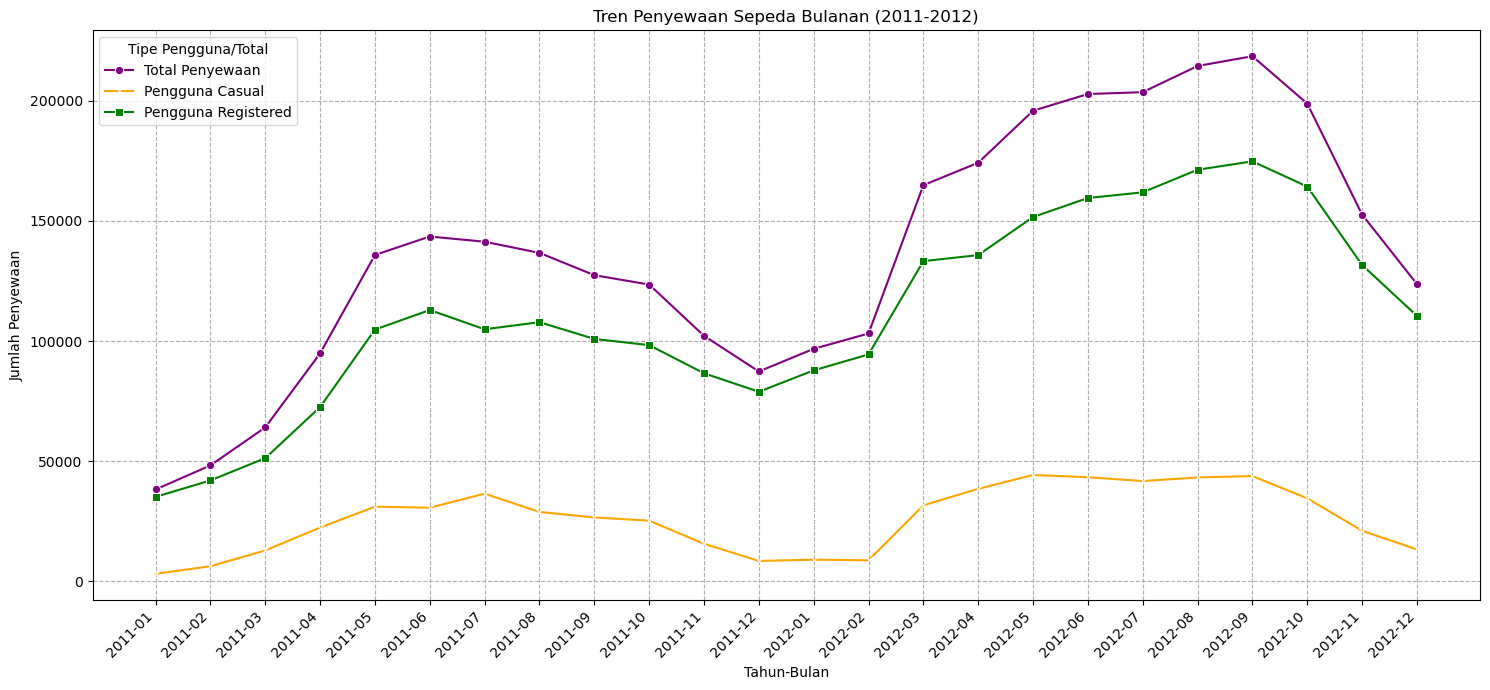

In [11]:
monthly_trends = day_df_cleaned.copy()
monthly_trends['year_month_dt'] = monthly_trends['date'].dt.to_period('M') # Untuk grouping
monthly_agg = monthly_trends.groupby('year_month_dt').agg(
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum'),
    total_all_rentals=('total_rentals', 'sum')
).reset_index()
monthly_agg['year_month_str'] = monthly_agg['year_month_dt'].astype(str) # Untuk plotting

plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_agg, x='year_month_str', y='total_all_rentals', marker='o', label='Total Penyewaan', color='purple')
sns.lineplot(data=monthly_agg, x='year_month_str', y='total_casual', marker='x', label='Pengguna Casual', color='orange')
sns.lineplot(data=monthly_agg, x='year_month_str', y='total_registered', marker='s', label='Pengguna Registered', color='green')
plt.title('Tren Penyewaan Sepeda Bulanan (2011-2012)')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipe Pengguna/Total')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

#### Insight Pertanyaan Tambahan 4:
- **Tren Pertumbuhan:** Secara keseluruhan, terdapat tren peningkatan penyewaan dari tahun 2011 ke 2012.
- **Pola Musiman Bulanan:** Puncak penyewaan terlihat jelas di pertengahan tahun (bulan-bulan musim panas dan gugur), dan penurunan di awal dan akhir tahun (musim dingin dan semi awal).
- **Kontribusi Pengguna:** Pengguna terdaftar (registered) secara konsisten memberikan kontribusi penyewaan yang jauh lebih besar dibandingkan pengguna biasa (casual).
- **Pertumbuhan Tipe Pengguna:** Kedua tipe pengguna menunjukkan pertumbuhan, namun pertumbuhan pengguna terdaftar tampaknya lebih dominan dalam peningkatan total penyewaan.


### Pertanyaan Tambahan 5: Bagaimana distribusi jumlah penyewaan sepeda harian (`total_rentals`) bervariasi berdasarkan hari dalam seminggu (`weekday`), dan apakah ada perbedaan signifikan dalam variabilitas serta median antara pengguna casual dan registered?

C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\4080683757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df_cleaned, x='weekday', y='total_rentals', palette='pastel')
C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\4080683757.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df_cleaned, x='weekday', y='casual', palette='pastel')
C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\4080683757.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df_cleaned, x='weekday', y='registered', palette='pastel')


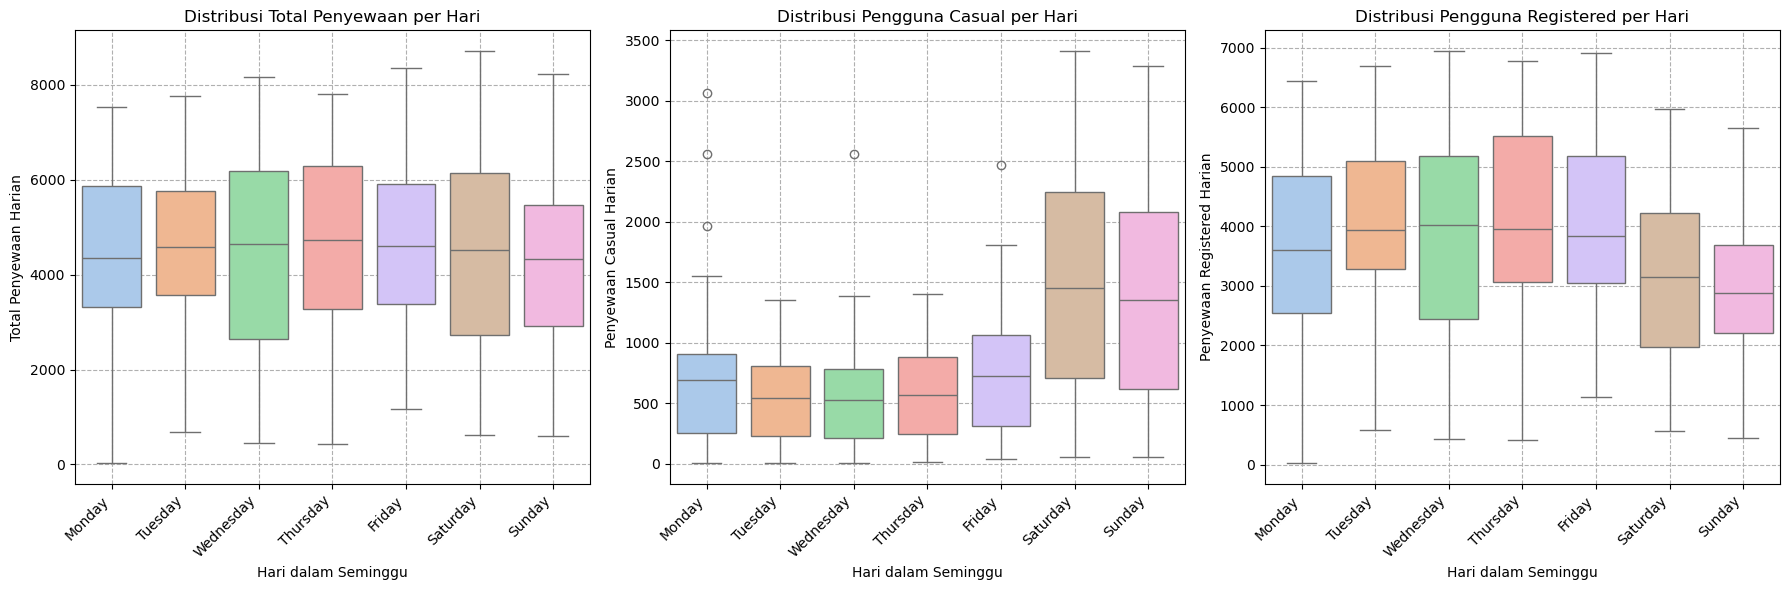

In [12]:
day_df_cleaned['weekday'] = pd.Categorical(day_df_cleaned['weekday'], categories=day_order, ordered=True)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=day_df_cleaned, x='weekday', y='total_rentals', palette='pastel')
plt.title('Distribusi Total Penyewaan per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewaan Harian')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')

plt.subplot(1, 3, 2)
sns.boxplot(data=day_df_cleaned, x='weekday', y='casual', palette='pastel')
plt.title('Distribusi Pengguna Casual per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Penyewaan Casual Harian')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')

plt.subplot(1, 3, 3)
sns.boxplot(data=day_df_cleaned, x='weekday', y='registered', palette='pastel')
plt.title('Distribusi Pengguna Registered per Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Penyewaan Registered Harian')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()

#### Insight Pertanyaan Tambahan 5:
- **Total Penyewaan:** Akhir pekan (Sabtu dan Minggu) menunjukkan median penyewaan total harian yang lebih tinggi dibandingkan hari kerja, meskipun variabilitasnya juga cenderung lebih besar.
- **Pengguna Casual:** Penyewaan pengguna casual jelas lebih tinggi dan lebih bervariasi pada akhir pekan (Sabtu, Minggu) dibandingkan hari kerja. Median penyewaan casual pada hari kerja relatif rendah dan stabil.
- **Pengguna Registered:** Pengguna terdaftar menunjukkan median penyewaan yang relatif konsisten sepanjang hari kerja, dengan sedikit penurunan pada akhir pekan. Variabilitas pada hari kerja lebih kecil dibandingkan pengguna casual di akhir pekan.
- **Kesimpulan:** Akhir pekan didominasi oleh lonjakan pengguna casual yang mencari rekreasi, sementara hari kerja didominasi oleh pengguna terdaftar yang lebih stabil, kemungkinan untuk komuter.

### Pertanyaan Tambahan 6: Bagaimana dampak variabel cuaca kontinu seperti suhu (`temperature`), suhu yang dirasakan (`feeling_temperature`), kelembapan (`humidity`), dan kecepatan angin (`windspeed`) terhadap jumlah total penyewaan sepeda harian?

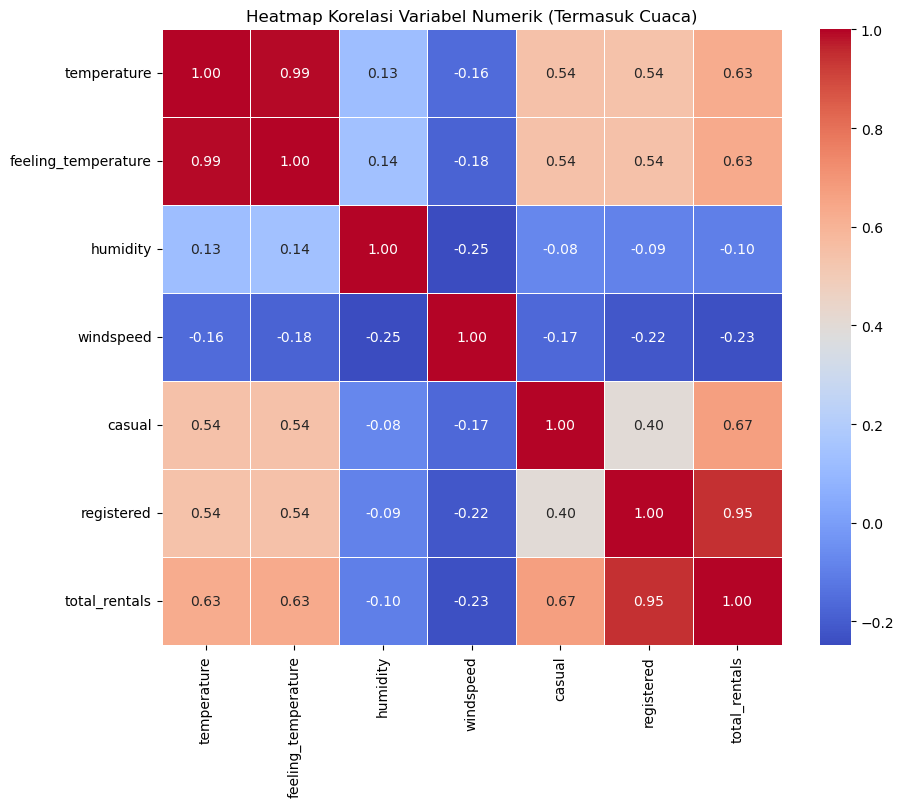

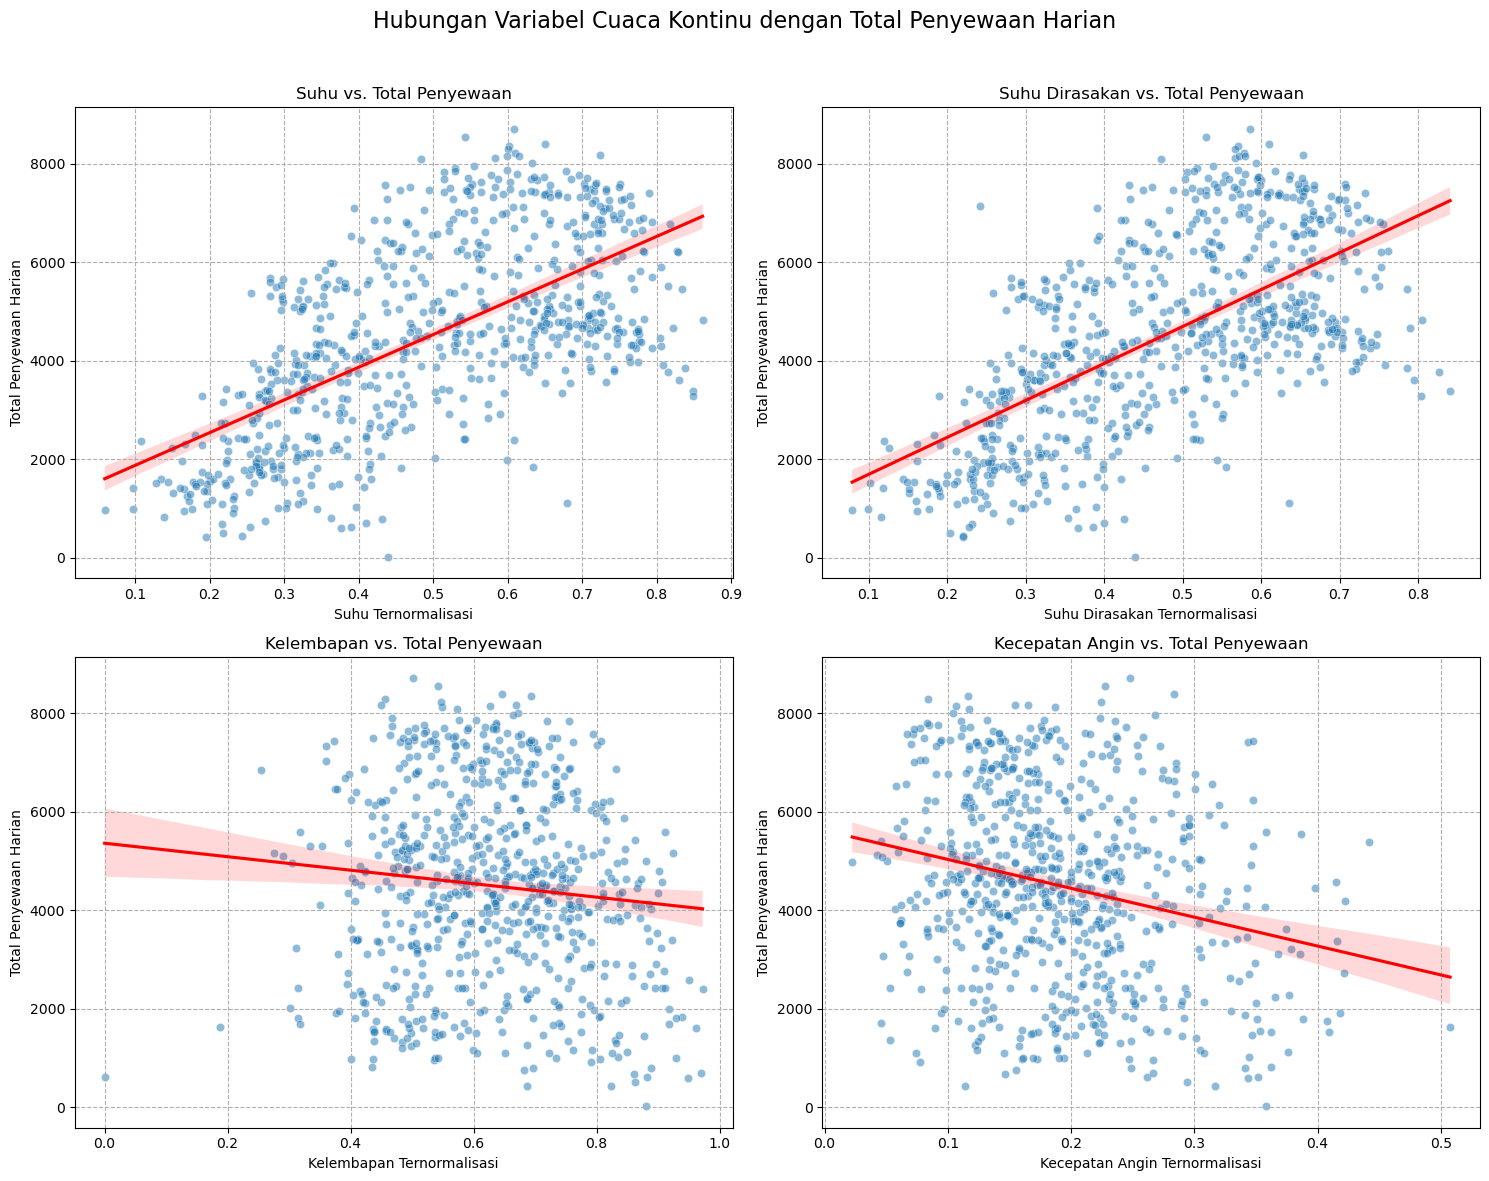

In [13]:
numerical_cols_weather = ['temperature', 'feeling_temperature', 'humidity', 'windspeed', 'casual', 'registered', 'total_rentals']
correlation_matrix_weather = day_df_cleaned[numerical_cols_weather].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_weather, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Variabel Numerik (Termasuk Cuaca)')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Hubungan Variabel Cuaca Kontinu dengan Total Penyewaan Harian', fontsize=16)

sns.scatterplot(ax=axes[0, 0], data=day_df_cleaned, x='temperature', y='total_rentals', alpha=0.5)
sns.regplot(ax=axes[0, 0], data=day_df_cleaned, x='temperature', y='total_rentals', scatter=False, color='red')
axes[0, 0].set_title('Suhu vs. Total Penyewaan')
axes[0, 0].set_xlabel('Suhu Ternormalisasi')
axes[0, 0].set_ylabel('Total Penyewaan Harian')
axes[0,0].grid(True, linestyle='--')

sns.scatterplot(ax=axes[0, 1], data=day_df_cleaned, x='feeling_temperature', y='total_rentals', alpha=0.5)
sns.regplot(ax=axes[0, 1], data=day_df_cleaned, x='feeling_temperature', y='total_rentals', scatter=False, color='red')
axes[0, 1].set_title('Suhu Dirasakan vs. Total Penyewaan')
axes[0, 1].set_xlabel('Suhu Dirasakan Ternormalisasi')
axes[0, 1].set_ylabel('Total Penyewaan Harian')
axes[0,1].grid(True, linestyle='--')

sns.scatterplot(ax=axes[1, 0], data=day_df_cleaned, x='humidity', y='total_rentals', alpha=0.5)
sns.regplot(ax=axes[1, 0], data=day_df_cleaned, x='humidity', y='total_rentals', scatter=False, color='red')
axes[1, 0].set_title('Kelembapan vs. Total Penyewaan')
axes[1, 0].set_xlabel('Kelembapan Ternormalisasi')
axes[1, 0].set_ylabel('Total Penyewaan Harian')
axes[1,0].grid(True, linestyle='--')

sns.scatterplot(ax=axes[1, 1], data=day_df_cleaned, x='windspeed', y='total_rentals', alpha=0.5)
sns.regplot(ax=axes[1, 1], data=day_df_cleaned, x='windspeed', y='total_rentals', scatter=False, color='red')
axes[1, 1].set_title('Kecepatan Angin vs. Total Penyewaan')
axes[1, 1].set_xlabel('Kecepatan Angin Ternormalisasi')
axes[1, 1].set_ylabel('Total Penyewaan Harian')
axes[1,1].grid(True, linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Insight Pertanyaan Tambahan 6:
- **Korelasi Suhu:** `temperature` dan `feeling_temperature` memiliki korelasi positif yang kuat (sekitar 0.63) dengan `total_rentals`.
- **Korelasi Kelembapan:** `humidity` memiliki korelasi negatif yang lemah (sekitar -0.10) dengan `total_rentals`.
- **Korelasi Kecepatan Angin:** `windspeed` memiliki korelasi negatif yang sedang (sekitar -0.23) dengan `total_rentals`.
- **Kesimpulan:** Suhu adalah pendorong positif utama. Kecepatan angin berdampak negatif lebih signifikan daripada kelembapan.


### Pertanyaan Tambahan 7: Bagaimana pola penyewaan sepeda per jam (`hour`) bervariasi tidak hanya berdasarkan tipe hari (`workingday`) tetapi juga berdasarkan musim (`season`)?


C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\1806501454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_seasonal_pattern = hour_df_cleaned.groupby(by=["season", "workingday", "hour"])["total_rentals"].mean().reset_index()


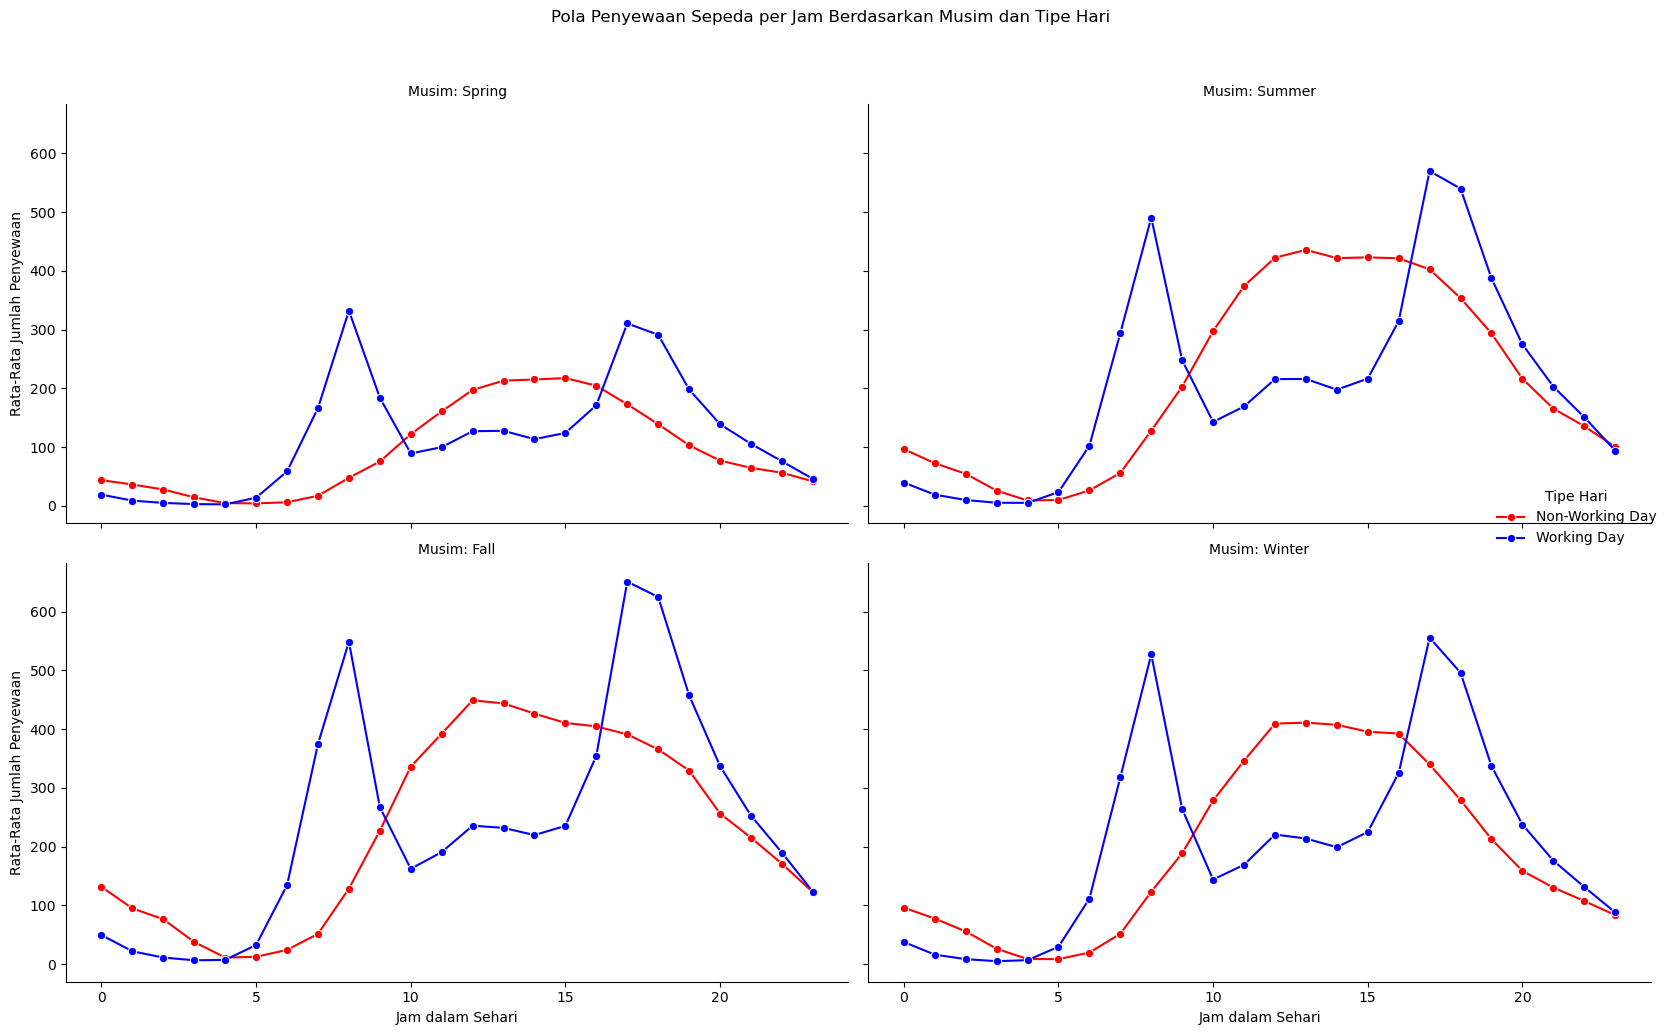

In [14]:
hourly_seasonal_pattern = hour_df_cleaned.groupby(by=["season", "workingday", "hour"])["total_rentals"].mean().reset_index()
hourly_seasonal_pattern['season'] = pd.Categorical(hourly_seasonal_pattern['season'], categories=season_order, ordered=True)
hourly_seasonal_pattern = hourly_seasonal_pattern.sort_values(['season', 'workingday', 'hour'])

g = sns.FacetGrid(hourly_seasonal_pattern, col="season", hue="workingday", col_wrap=2, height=5, aspect=1.5, palette={"Working Day": "blue", "Non-Working Day": "red"})
g.map(sns.lineplot, "hour", "total_rentals", marker="o")
g.set_axis_labels("Jam dalam Sehari", "Rata-Rata Jumlah Penyewaan")
g.set_titles("Musim: {col_name}")
g.add_legend(title="Tipe Hari")
g.fig.suptitle("Pola Penyewaan Sepeda per Jam Berdasarkan Musim dan Tipe Hari", y=1.03)
plt.tight_layout()
plt.show()

#### Insight Pertanyaan Tambahan 7:
- **Pola Hari Kerja Lintas Musim:** Puncak komuter pagi dan sore pada hari kerja tetap terlihat di semua musim, namun intensitasnya bervariasi; puncak sore di Musim Gugur dan Musim Panas lebih tinggi.
- **Pola Non-Hari Kerja Lintas Musim:** Di Musim Semi dan Dingin, puncak penyewaan di non-hari kerja lebih rendah. Di Musim Panas dan Gugur, penyewaan di non-hari kerja lebih tinggi dan berlangsung lebih lama.
- **Kesimpulan:** Musim memodifikasi pola per jam. Intensitas dan durasi puncak penyewaan dipengaruhi oleh kenyamanan musim.


### Analisis Tambahan: Proporsi Pengguna Casual vs. Registered Berdasarkan Musim

C:\Users\nurim\AppData\Local\Temp\ipykernel_20692\2749066063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_user_type = day_df_cleaned.groupby(by=["season"])[['casual', 'registered']].sum().reset_index()


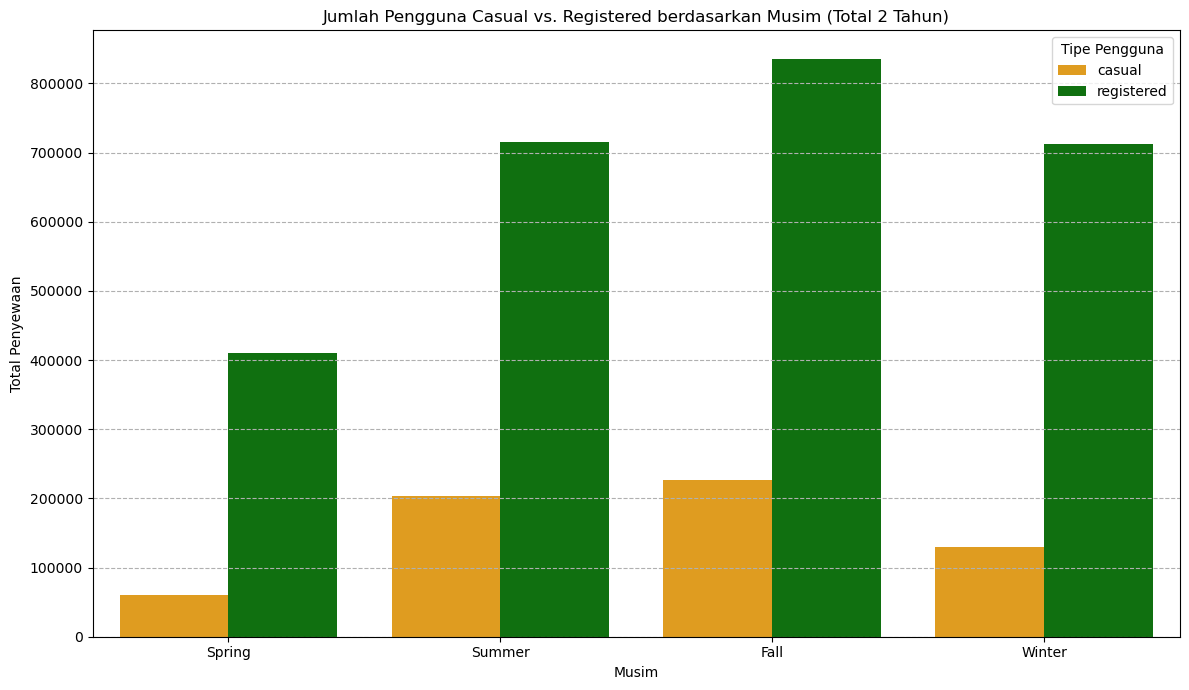

In [15]:
seasonal_user_type = day_df_cleaned.groupby(by=["season"])[['casual', 'registered']].sum().reset_index()
seasonal_user_type_melted = seasonal_user_type.melt(id_vars=['season'], value_vars=['casual', 'registered'], var_name='user_type', value_name='total_rentals')
seasonal_user_type_melted['season'] = pd.Categorical(seasonal_user_type_melted['season'], categories=season_order, ordered=True)
seasonal_user_type_melted = seasonal_user_type_melted.sort_values('season')

plt.figure(figsize=(12, 7))
sns.barplot(data=seasonal_user_type_melted, x='season', y='total_rentals', hue='user_type', palette={'casual': 'orange', 'registered': 'green'})
plt.title('Jumlah Pengguna Casual vs. Registered berdasarkan Musim (Total 2 Tahun)')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### Insight:
- Pengguna terdaftar (registered) mendominasi jumlah penyewaan di semua musim.
- Pengguna biasa (casual) menunjukkan peningkatan yang lebih proporsional selama musim yang lebih hangat (Summer, Fall).


## Analisis Lanjutan : Clustering Penggunaan Bulanan Berdasarkan Total Penyewaan (Binning Manual)

**Tujuan:** Mengelompokkan bulan-bulan ke dalam kategori penggunaan (rendah, sedang, tinggi) berdasarkan total penyewaan sepeda bulanan untuk lebih memahami variasi musiman dan mendukung perencanaan operasional.

**Alasan Menggunakan Teknik Ini:**
* **Identifikasi Pola Musiman yang Jelas:** Dengan fokus pada total penyewaan, kita dapat secara langsung melihat bulan-bulan mana yang merupakan puncak atau lembah aktivitas.
* **Optimasi Sumber Daya:** Pengelompokan ini membantu operator mengalokasikan sumber daya (jumlah sepeda, staf, pemeliharaan) secara lebih efisien sepanjang tahun.
* **Dasar untuk Strategi Pemasaran:** Memahami bulan mana yang "lambat" atau "ramai" bisa menjadi dasar untuk kampanye pemasaran yang ditargetkan.

**Metodologi:**
### 1. Agregasi Data Bulanan dari day_df_cleaned

In [16]:
monthly_total_rentals_df = day_df_cleaned.copy()
monthly_total_rentals_df['year_month_dt'] = monthly_total_rentals_df['date'].dt.to_period('M')
monthly_aggregated_totals = monthly_total_rentals_df.groupby('year_month_dt')['total_rentals'].sum().reset_index()
monthly_aggregated_totals['year_month_str'] = monthly_aggregated_totals['year_month_dt'].astype(str)

# Mengurutkan berdasarkan total penyewaan untuk membantu menentukan ambang batas
print("\nTotal Penyewaan Bulanan (Diurutkan untuk menentukan ambang batas):")
print(monthly_aggregated_totals.sort_values(by='total_rentals'))


Total Penyewaan Bulanan (Diurutkan untuk menentukan ambang batas):
   year_month_dt  total_rentals year_month_str
0        2011-01          38189        2011-01
1        2011-02          48215        2011-02
2        2011-03          64045        2011-03
11       2011-12          87323        2011-12
3        2011-04          94870        2011-04
12       2012-01          96744        2012-01
10       2011-11         102167        2011-11
13       2012-02         103137        2012-02
9        2011-10         123511        2011-10
23       2012-12         123713        2012-12
8        2011-09         127418        2011-09
4        2011-05         135821        2011-05
7        2011-08         136691        2011-08
6        2011-07         141341        2011-07
5        2011-06         143512        2011-06
22       2012-11         152664        2012-11
14       2012-03         164875        2012-03
15       2012-04         174224        2012-04
16       2012-05         195865        

### 2. Penentuan Ambang Batas (Contoh berdasarkan observasi, bisa disesuaikan)
Amati output di atas untuk menyesuaikan ambang batas ini.
Misal, setelah observasi:

In [17]:
low_usage_threshold = 100000  # Contoh, penyewaan di bawah 100rb dianggap rendah
medium_usage_threshold = 200000 # Contoh, penyewaan antara 100rb-200rb dianggap sedang

### 3. Pelabelan Cluster

In [18]:
def assign_total_rental_cluster(total_rentals_val): # Ubah nama parameter agar tidak konflik
    if total_rentals_val <= low_usage_threshold:
        return 'Rendah'
    elif total_rentals_val <= medium_usage_threshold:
        return 'Sedang'
    else:
        return 'Tinggi'

monthly_aggregated_totals['usage_cluster'] = monthly_aggregated_totals['total_rentals'].apply(assign_total_rental_cluster)

# Urutan cluster untuk legenda yang lebih baik
cluster_order_viz = ['Rendah', 'Sedang', 'Tinggi']
monthly_aggregated_totals['usage_cluster'] = pd.Categorical(monthly_aggregated_totals['usage_cluster'], categories=cluster_order_viz, ordered=True)

### 4. Visualisasi

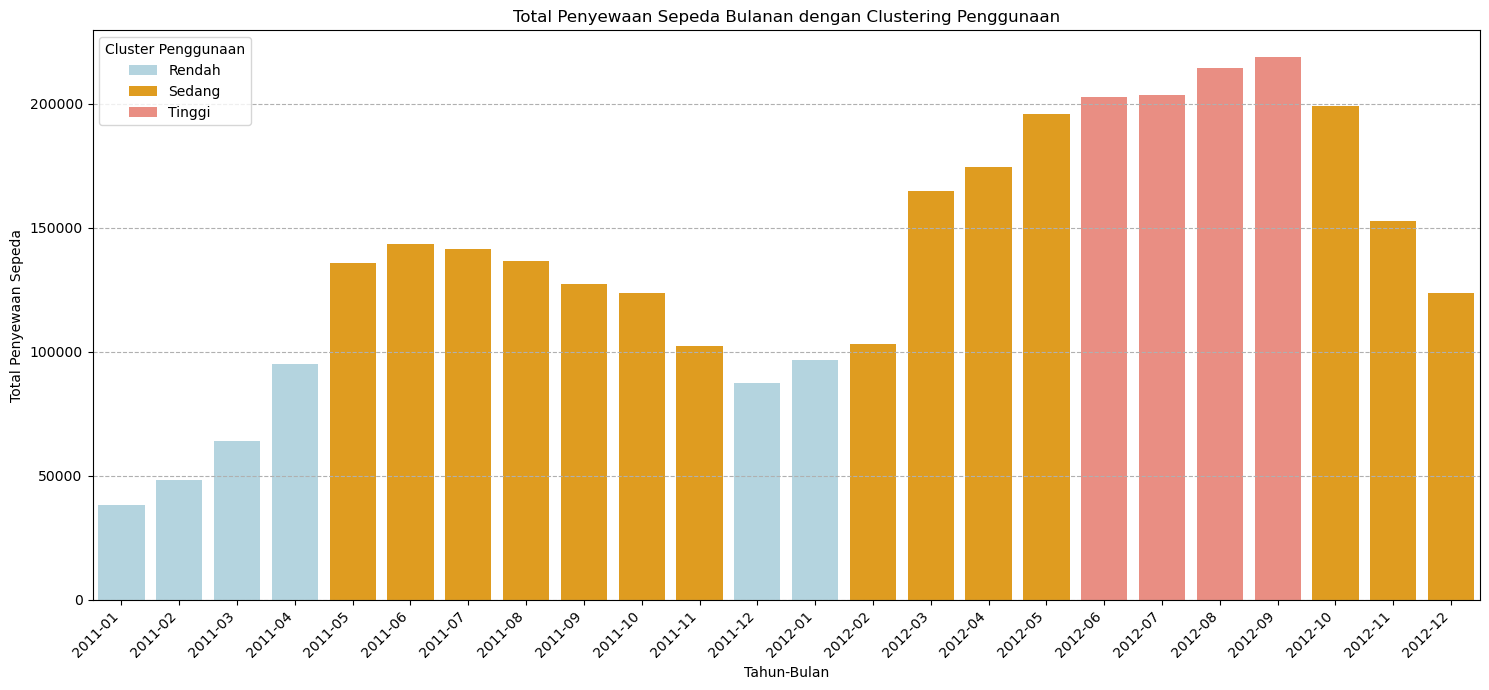


Ringkasan Bulan per Cluster Penggunaan (Total Rentals):

Cluster Rendah:
2011-01, 2011-02, 2011-03, 2011-04, 2011-12, 2012-01

Cluster Sedang:
2011-05, 2011-06, 2011-07, 2011-08, 2011-09, 2011-10, 2011-11, 2012-02, 2012-03, 2012-04, 2012-05, 2012-10, 2012-11, 2012-12

Cluster Tinggi:
2012-06, 2012-07, 2012-08, 2012-09


In [19]:
plt.figure(figsize=(15, 7))
sns.barplot(
    data=monthly_aggregated_totals,
    x='year_month_str',
    y='total_rentals',
    hue='usage_cluster',
    palette={'Rendah': 'lightblue', 'Sedang': 'orange', 'Tinggi': 'salmon'},
    dodge=False
)
plt.title('Total Penyewaan Sepeda Bulanan dengan Clustering Penggunaan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster Penggunaan')
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nRingkasan Bulan per Cluster Penggunaan (Total Rentals):")
for cluster_name_val in cluster_order_viz: # Ubah nama variabel agar tidak konflik
    print(f"\nCluster {cluster_name_val}:")
    months_in_cluster_val = monthly_aggregated_totals[monthly_aggregated_totals['usage_cluster'] == cluster_name_val]['year_month_str'].tolist()
    print(", ".join(months_in_cluster_val) if months_in_cluster_val else "Tidak ada bulan dalam cluster ini")


#### Potensi Insight dari Pendekatan Ini (Clustering Total Rentals):
- **Visualisasi Tren Musiman yang Jelas:** Bar chart yang diwarnai berdasarkan cluster akan dengan jelas menunjukkan periode penggunaan rendah, sedang, dan tinggi sepanjang dua tahun.
- **Identifikasi Bulan Kritis:** Bulan-bulan yang masuk dalam cluster 'Rendah' mungkin memerlukan strategi khusus untuk meningkatkan penggunaan.
- **Perencanaan Kapasitas:** Bulan-bulan di cluster 'Tinggi' menandakan perlunya kesiapan armada sepeda yang maksimal.
- **Validasi Ambang Batas:** Dengan melihat output tabel yang diurutkan, Anda dapat menyesuaikan `low_usage_threshold` dan `medium_usage_threshold` agar lebih sesuai dengan distribusi alami data, sehingga pengelompokan menjadi lebih bermakna.


Berikut adalah *insight* dan rekomendasi yang lebih ringkas dan terfokus pada klaster penggunaan, disesuaikan dengan konteks dataset penyewaan sepeda:

**1. Klaster "Rendah" (Biru Muda)**

* **Insight:** Periode awal tahun (Januari-Maret 2011 dan Januari-Februari 2012) dengan volume penyewaan terendah. Dipengaruhi oleh cuaca dingin atau kurang mendukung (musim dingin/awal semi) dan kemungkinan juga oleh hari libur atau non-kerja.
* **Rekomendasi:**
    * Tawarkan promosi harga khusus atau diskon bertema cuaca/musim.
    * Manfaatkan periode ini untuk perawatan dan *upgrade* armada besar, meminimalkan dampak *downtime*.
    * Analisis dan sesuaikan strategi promosi untuk hari-hari dengan penggunaan terendah (misalnya, akhir pekan atau hari libur tertentu).

**2. Klaster "Sedang" (Oranye)**

* **Insight:** Mayoritas bulan di 2011 dan fase transisi di 2012, menunjukkan volume penyewaan yang stabil namun belum puncak. Kondisi lingkungan (cuaca, musim gugur/panas) cenderung moderat. Pola penggunaan dipengaruhi oleh hari kerja/akhir pekan.
* **Rekomendasi:**
    * Optimalkan penempatan sepeda di stasiun populer berdasarkan pola penggunaan harian/mingguan.
    * Jalin kemitraan dengan komunitas atau perusahaan untuk mendorong penggunaan rutin, terutama pada hari kerja.
    * Fokus pada pemasaran yang menonjolkan manfaat kesehatan dan lingkungan dari bersepeda.

**3. Klaster "Tinggi" (Merah Muda)**

* **Insight:** Puncak penggunaan (Juni-September 2012) dengan volume sangat tinggi, kondisi cuaca paling ideal. Lonjakan ini juga bisa dipengaruhi oleh acara atau festival kota, serta peningkatan pengguna kasual (wisatawan/rekreasi).
* **Rekomendasi:**
    * Pastikan ketersediaan armada maksimal, bahkan pertimbangkan penambahan sementara.
    * Tingkatkan efisiensi redistribusi sepeda antar stasiun untuk memenuhi permintaan di area padat.
    * Terapkan harga dinamis (harga lebih tinggi) selama periode puncak untuk memaksimalkan pendapatan.
    * Manfaatkan informasi event kota untuk promosi yang ditargetkan.
    * Desain paket khusus untuk pengguna kasual/turis.

## Conclusion

- **Kesimpulan Pertanyaan 1 (Pengaruh Musim):** Musim sangat mempengaruhi perilaku penyewaan sepeda. Jumlah penyewaan tertinggi terjadi pada Musim Gugur (Fall) dan Musim Panas (Summer), sementara Musim Semi (Spring) mencatat jumlah terendah. Ada peningkatan umum penyewaan dari tahun 2011 ke 2012.

- **Kesimpulan Pertanyaan 2 (Pola Hari Kerja vs. Libur):** Hari kerja menunjukkan pola komuter (puncak pagi & sore). Non-hari kerja menunjukkan pola rekreasi (puncak siang-sore yang lebih landai).

- **Kesimpulan Pertanyaan 3 (Dampak Kondisi Cuaca):** Kondisi cuaca adalah faktor penting. Cuaca 'Cerah/Berawan' menghasilkan jumlah penyewaan tertinggi; hujan ringan/salju ringan menurunkannya drastis.

- **Kesimpulan Pertanyaan Tambahan 4 (Tren Bulanan):** Tren penyewaan bulanan menunjukkan pertumbuhan dari 2011 ke 2012 dan pola musiman yang jelas. Pengguna terdaftar mendominasi total penyewaan dan pertumbuhannya.

- **Kesimpulan Pertanyaan Tambahan 5 (Distribusi Harian per Hari):** Akhir pekan memiliki median penyewaan total dan casual yang lebih tinggi serta lebih bervariasi. Hari kerja menunjukkan penyewaan pengguna terdaftar yang lebih stabil.

- **Kesimpulan Pertanyaan Tambahan 6 (Dampak Cuaca Kontinu):** Suhu (aktual dan dirasakan) berkorelasi positif kuat dengan penyewaan. Kecepatan angin berkorelasi negatif sedang, dan kelembapan berkorelasi negatif lemah.

- **Kesimpulan Pertanyaan Tambahan 7 (Interaksi Pola Jam, Musim, Tipe Hari):** Pola dasar komuter dan rekreasi per jam tetap ada di semua musim, namun intensitas dan durasi puncaknya dimodifikasi oleh kondisi musiman.

- **Kesimpulan Analisis Lanjutan (Clustering Penggunaan Bulanan Berdasarkan Total Penyewaan):**
    1.  **Klaster "Rendah" (Awal Tahun):** Periode ini (Januari-Maret 2011, Januari-Februari 2012) dicirikan oleh volume penyewaan yang minim, terutama karena cuaca dingin atau buruk. Rekomendasi strategis untuk periode ini adalah berfokus pada pemeliharaan armada dan penawaran promosi khusus untuk menstimulasi penggunaan yang rendah.
    2.  **Klaster "Sedang" (Transisi & Stabil):** Klaster ini mendominasi sebagian besar tahun 2011 dan bertindak sebagai jembatan di tahun 2012, dengan volume penyewaan moderat yang dipengaruhi oleh kondisi cuaca yang lebih nyaman dan pola penggunaan reguler. Strategi di sini meliputi optimalisasi penempatan sepeda berdasarkan pola harian/mingguan dan kemitraan untuk mendorong penggunaan komuter.
    3.  **Klaster "Tinggi" (Puncak Musim Panas):** Muncul di pertengahan tahun 2012 (Juni-September), ini adalah periode dengan volume penyewaan tertinggi yang didorong oleh cuaca ideal musim panas serta kemungkinan adanya acara besar di kota dan peningkatan pengguna kasual. Fokus di periode ini adalah memaksimalkan kapasitas armada, menerapkan harga dinamis, dan pemasaran berbasis pengalaman.

In [20]:
## Menyimpan Dataframe yang Sudah Dibersihkan untuk Dashboard
day_df_cleaned.to_csv("dashboard/dashboard_main_data_day.csv", index=False)
hour_df_cleaned.to_csv("dashboard/dashboard_main_data_hour.csv", index=False)
print("\nDataframe day_df_cleaned dan hour_df_cleaned telah disimpan.")


Dataframe day_df_cleaned dan hour_df_cleaned telah disimpan.
